## Explore results from runs that have Kv maps parametrized by Kv and epsilon

Compare Tr upwelled, HCW, N^2 and Tr concetration profiles.

In [1]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.gridspec as gspec
import numpy as np
import seaborn as sns
import scipy.stats
import pandas as pd

import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg

import os
import sys
import warnings
warnings.filterwarnings("ignore")

/home/kramosmu/anaconda3/lib/python3.5/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
grid_file1 = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run01/gridGlob.nc'
state_file2 = '/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/run01/stateGlob.nc'

with Dataset(grid_file1, 'r') as nbl:
    Z1 = nbl.variables['RC'][:]
    hfac = nbl.variables['HFacC'][:,:,:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
with Dataset(state_file2,'r') as stfl:
    time = stfl.variables['T'][:]

mask = rout.getMask(grid_file1,'HFacC')    
nx = 616
ny = 360
nz = 90

In [3]:
class run:
        pass
    
CNTDIFF_run38 = run()
VISC3D_run06 = run()
VISC3D_run05 = run()
VISC3D_run03 = run()
VISC3D_REALISTIC_run07 = run()
VISC3D_REALISTIC_run08 = run()
VISC3D_REALISTIC_run09 = run()
VISC3D_REALISTIC_run10 = run()
VISC3D_REALISTIC_run11 = run()
VISC3D_REALISTIC_run12 = run()
VISC3D_REALISTIC_run13 = run()
VISC3D_REALISTIC_run14 = run()
VISC3D_REALISTIC_run15 = run()
VISC3D_REALISTIC_run16 = run()
VISC3D_REALISTIC_run17 = run()
#VISC3D_REALISTIC_run18 = run() # exact same file as 3DVISC 10ˆ-2 
VISC3D_REALISTIC_run19 = run()
VISC3D_REALISTIC_run20 = run()
VISC3D_REALISTIC_run21 = run()
VISC3D_REALISTIC_run22 = run()
VISC3D_REALISTIC_run23 = run()
VISC3D_REALISTIC_run24 = run()
VISC3D_REALISTIC_run25 = run()
VISC3D_REALISTIC_run26 = run()
VISC3D_REALISTIC_run27 = run()
VISC3D_REALISTIC_run28 = run()


records = [ CNTDIFF_run38 ,
            VISC3D_run06 ,
            VISC3D_run05 ,
            VISC3D_run03 ,
            VISC3D_REALISTIC_run24 , # epsilon 5,   kv 1.2E-2
            VISC3D_REALISTIC_run14 , # epsilon 5,   kv 1.001E-2
            VISC3D_REALISTIC_run27 , # epsilon 5,   kv 1.001E-2, no smoothing
            VISC3D_REALISTIC_run07 , # epsilon 10,  kv 1.001E-2
            VISC3D_REALISTIC_run11 , # epsilon 15,  kv 1.001E-2
            VISC3D_REALISTIC_run08 , # epsilon 25,  kv 1.001E-2
            VISC3D_REALISTIC_run09 , # epsilon 50,  kv 1.001E-2
            VISC3D_REALISTIC_run12 , # epsilon 75,  kv 1.001E-2
            VISC3D_REALISTIC_run10 , # epsilon 100, kv 1.001E-2
            VISC3D_REALISTIC_run13 , # epsilon 150, kv 1.001E-2
            VISC3D_REALISTIC_run15 , # epsilon 5,   kv 1E-2
            VISC3D_REALISTIC_run28 , # epsilon 5,   kv 1.0E-2, correct z levels
            VISC3D_REALISTIC_run23 , # epsilon 5,   kv 8E-3
            VISC3D_REALISTIC_run17 , # epsilon 5,   kv 5E-3
            VISC3D_REALISTIC_run21 , # epsilon 25,  kv 5E-3, 
            VISC3D_REALISTIC_run22 , # epsilon 100,  kv 5E-3, 
            VISC3D_REALISTIC_run25 , # epsilon 5,   kv 2.5E-3
            VISC3D_REALISTIC_run16 , # epsilon 5,   kv 1E-3
            VISC3D_REALISTIC_run19 , # epsilon 25,   kv 1E-3
            VISC3D_REALISTIC_run20 , # epsilon 100,   kv 1E-3
            VISC3D_REALISTIC_run26 , # epsilon 5,   kv 5E-4
           ]

records_nobase = [VISC3D_run06 ,
                  VISC3D_run05 ,
                  VISC3D_run03 ,
                  VISC3D_REALISTIC_run24 , # epsilon 5,   kv 1.2E-2
                  VISC3D_REALISTIC_run14 , # epsilon 5,   kv 1.001E-2
                  VISC3D_REALISTIC_run27 , # epsilon 5,   kv 1.00E-2, no smoothing
                  VISC3D_REALISTIC_run07 , # epsilon 10,  kv 1.001E-2
                  VISC3D_REALISTIC_run11 , # epsilon 15,  kv 1.001E-2
                  VISC3D_REALISTIC_run08 , # epsilon 25,  kv 1.001E-2
                  VISC3D_REALISTIC_run09 , # epsilon 50,  kv 1.001E-2
                  VISC3D_REALISTIC_run12 , # epsilon 75,  kv 1.001E-2
                  VISC3D_REALISTIC_run10 , # epsilon 100, kv 1.001E-2
                  VISC3D_REALISTIC_run13 , # epsilon 150, kv 1.001E-2
                  VISC3D_REALISTIC_run15 , # epsilon 5,   kv 1E-2
                  VISC3D_REALISTIC_run28 , # epsilon 5,   kv 1.0E-2, correct z levels
                  VISC3D_REALISTIC_run23 , # epsilon 5,   kv 8E-3
                  VISC3D_REALISTIC_run17 , # epsilon 5,   kv 5E-3
                  VISC3D_REALISTIC_run21 , # epsilon 25,  kv 5E-3, 
                  VISC3D_REALISTIC_run22 , # epsilon 100,  kv 5E-3, 
                  VISC3D_REALISTIC_run25 , # epsilon 5,   kv 2.5E-3
                  VISC3D_REALISTIC_run16 , # epsilon 5,   kv 1E-3
                  VISC3D_REALISTIC_run19 , # epsilon 25,   kv 1E-3
                  VISC3D_REALISTIC_run20 , # epsilon 100,   kv 1E-3
                  VISC3D_REALISTIC_run26 , # epsilon 5,   kv 5E-4
                  ]

records_sel =   [ VISC3D_run06 ,
                  VISC3D_REALISTIC_run14 , # epsilon 5,   kv 1.001E-2
                  VISC3D_REALISTIC_run07 , # epsilon 10,  kv 1.001E-2
                  VISC3D_REALISTIC_run15 , # epsilon 5,   kv 1E-2
                  VISC3D_REALISTIC_run17 , # epsilon 5,   kv 5E-3
                ]

names = ['CNTDIFF_run38' ,
         'VISC3D_run06' ,
         'VISC3D_run05' ,
         'VISC3D_run03' ,
         'VISC3D_REALISTIC_run24' , # epsilon 5,   kv 1.2E-2
         'VISC3D_REALISTIC_run14' , # epsilon 5,   kv 1.001E-2
         'VISC3D_REALISTIC_run27' , # epsilon 5,   kv 1.001E-2, no smoothing
         'VISC3D_REALISTIC_run07' , # epsilon 10,  kv 1.001E-2
         'VISC3D_REALISTIC_run11' , # epsilon 15,  kv 1.001E-2
         'VISC3D_REALISTIC_run08' , # epsilon 25,  kv 1.001E-2
         'VISC3D_REALISTIC_run09' , # epsilon 50,  kv 1.001E-2
         'VISC3D_REALISTIC_run12' , # epsilon 75,  kv 1.001E-2
         'VISC3D_REALISTIC_run10' , # epsilon 100, kv 1.001E-2
         'VISC3D_REALISTIC_run13', # epsilon 150, kv 1.001E-2
         'VISC3D_REALISTIC_run15' , # epsilon 5,   kv 1E-2
         'VISC3D_REALISTIC_run28' , # epsilon 5,   kv 1.0E-2, correct z levels
         'VISC3D_REALISTIC_run23' , # epsilon 5,   kv 8E-3
         'VISC3D_REALISTIC_run17'  , # epsilon 5,   kv 5E-3
         'VISC3D_REALISTIC_run21' , # epsilon 25,  kv 5E-3, 
         'VISC3D_REALISTIC_run22' , # epsilon 100,  kv 5E-3, 
         'VISC3D_REALISTIC_run25' , # epsilon 5,   kv 2.5E-3
         'VISC3D_REALISTIC_run16' , # epsilon 5,   kv 1E-3
         'VISC3D_REALISTIC_run19' , # epsilon 25,   kv 1E-3
         'VISC3D_REALISTIC_run20' , # epsilon 100,   kv 1E-3
         'VISC3D_REALISTIC_run26' , # epsilon 5,   kv 5E-4
         ] 

exps = ['CNTDIFF', '3DVISC', '3DVISC', '3DVISC','3DVISC_REALISTIC', '3DVISC_REALISTIC', 
        '3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC',
        '3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC',
        '3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC',
        '3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC',
       '3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC','3DVISC_REALISTIC']

runs= ['run38', 'run06', 'run05', 'run03','run24', 'run14','run27','run07', 'run11',
       'run08', 'run09', 'run12', 'run10', 'run13', 'run15', 'run28','run23', 'run17','run21',
       'run22','run25', 'run16', 'run19','run20','run26']

labels = [r'base',
          r'$K_{can}=10^{-2}$ $m^2$s$^{-1}$',
          r'$K_{can}=5\times10^{-2}$ $m^2$s$^{-1}$',
          r'$K_{can}=10^{-3}$ $m^2$s$^{-1}$',
          r'$\epsilon=5$, $K_{can}=1.2x10^{-2}$', 
          r'$\epsilon=5$, $K_{can}=1.001^{-2}$',
          r'$\epsilon=5$, $K_{can}=1^{-2}$, no smooth',
          r'$\epsilon=10$, $K_{can}=1.001^{-2}$',
          r'$\epsilon=15$, $K_{can}=1.001^{-2}$',
          r'$\epsilon=25$, $K_{can}=1.001^{-2}$',
          r'$\epsilon=50$, $K_{can}=1.001^{-2}$',
          r'$\epsilon=75$, $K_{can}=1.001^{-2}$',
          r'$\epsilon=100$, $K_{can}=1.001^{-2}$',
          r'$\epsilon=150$, $K_{can}=1.001^{-2}$',
          r'$\epsilon=5$, $K_{can}=1^{-2}$',
          r' step $K_{can}=1^{-2}$, Z ok',
          r'$\epsilon=5$, $K_{can}=8^{-3}$',
          r'$\epsilon=5$, $K_{can}=5^{-3}$',
          r'$\epsilon=25$, $K_{can}=5^{-3}$',
          r'$\epsilon=100$, $K_{can}=5^{-3}$',
          r'$\epsilon=5$, $K_{can}=2.5 \times 10^{-3}$',
          r'$\epsilon=5$, $K_{can}=1^{-3}$',
          r'$\epsilon=25$, $K_{can}=1^{-3}$',
          r'$\epsilon=100$, $K_{can}=1^{-3}$',
          r'$\epsilon=5$, $K_{can}=5 \times ^{-4}$',
         ]

colors = ['black', 'jungle green','kelly green', 'light green', 
          'red', 'yellow',
          'mulberry','golden yellow', 'mustard yellow', 'dull orange','orange', 'orangey brown',
          'cocoa', 'mud brown',
          'magenta', 'light pink','pink',
          'blue','cerulean','sky blue','dusk',
          'purplish blue','purple','light purple','bluegrey',
          ]

Sizes = [11,16,16,16,11,14,11,11,11,11,11,11,11,11,11,11,13,11,13,11,11,11,11,11,11,11]
Markers = ['o','d','d','d','*','*','^','o','o','o','o','o','o','o','*','P','*','*','o','o','*','*','o','o','*']
for rec, name, exp, runnum, col, lab, size, marker in zip(records,names,exps,runs,colors,labels, Sizes, Markers):
    rec.name = name
    rec.exp = exp
    rec.run = runnum
    rec.color = col
    rec.label = lab
    rec.size = size
    rec.mark = marker

### HCW and Tracer upwelled

In [4]:
for ii in range(len(records)):

    file = ('/data/kramosmu/results/TracerExperiments/%s/HCW_TrMass_%s%s.csv' %(records[ii].exp,
                                                                                records[ii].exp,
                                                                                records[ii].run))
    print(file)
    dfcan = pd.read_csv(file)
    records[ii].HCW = dfcan['HCW']
    records[ii].TrMass = dfcan['TrMassHCW']
    records[ii].TrMassTot = dfcan['TotTrMass'] 

/data/kramosmu/results/TracerExperiments/CNTDIFF/HCW_TrMass_CNTDIFFrun38.csv
/data/kramosmu/results/TracerExperiments/3DVISC/HCW_TrMass_3DVISCrun06.csv
/data/kramosmu/results/TracerExperiments/3DVISC/HCW_TrMass_3DVISCrun05.csv
/data/kramosmu/results/TracerExperiments/3DVISC/HCW_TrMass_3DVISCrun03.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun24.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun14.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun27.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun07.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun11.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun08.csv
/data/kramosmu/results/TracerExperiments/3DVISC_REALISTIC/HCW_TrMass_3DVISC_REALISTICrun09.csv
/data/kramosmu/results/TracerExpe

Text(0.5,1,'Total tracer mass on shelf')

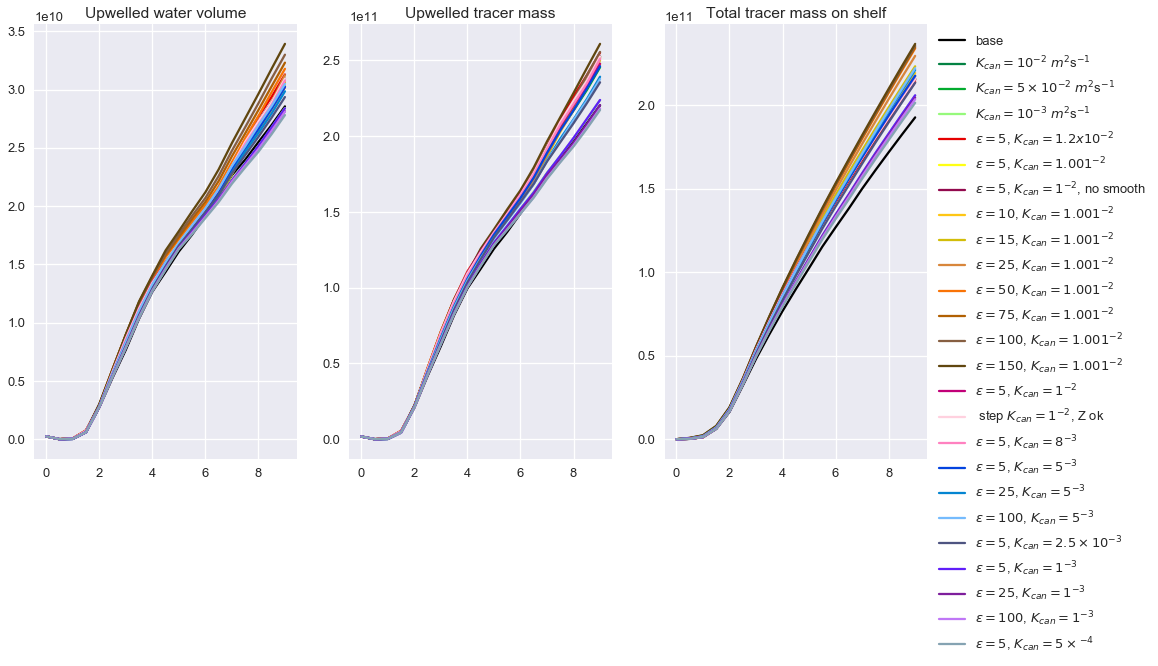

In [5]:
# Canyon cases
sns.set_context('talk')
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 3, figsize=(16,8))

for rec in records:
    ax[0].plot(np.arange(19)/2,rec.HCW, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[1].plot(np.arange(19)/2,rec.TrMass, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[2].plot(np.arange(19)/2,rec.TrMassTot-rec.TrMassTot[0], color=sns.xkcd_rgb[rec.color], label=rec.label)
    
    rec.Phi = np.mean(np.array([(rec.HCW[ii]-rec.HCW[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    rec.Phi_std = np.std(np.array([(rec.HCW[ii]-rec.HCW[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    
    rec.PhiTr = np.mean(np.array([(rec.TrMass[ii]-rec.TrMass[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    rec.PhiTr_std = np.std(np.array([(rec.TrMass[ii]-rec.TrMass[ii-1])/(time[ii]-time[ii-1]) for ii in range (9,18)]))
    
ax[2].legend(bbox_to_anchor=(1,1))
ax[0].set_title('Upwelled water volume')
ax[1].set_title('Upwelled tracer mass')
ax[2].set_title('Total tracer mass on shelf')

### Stratification and tracer gradient

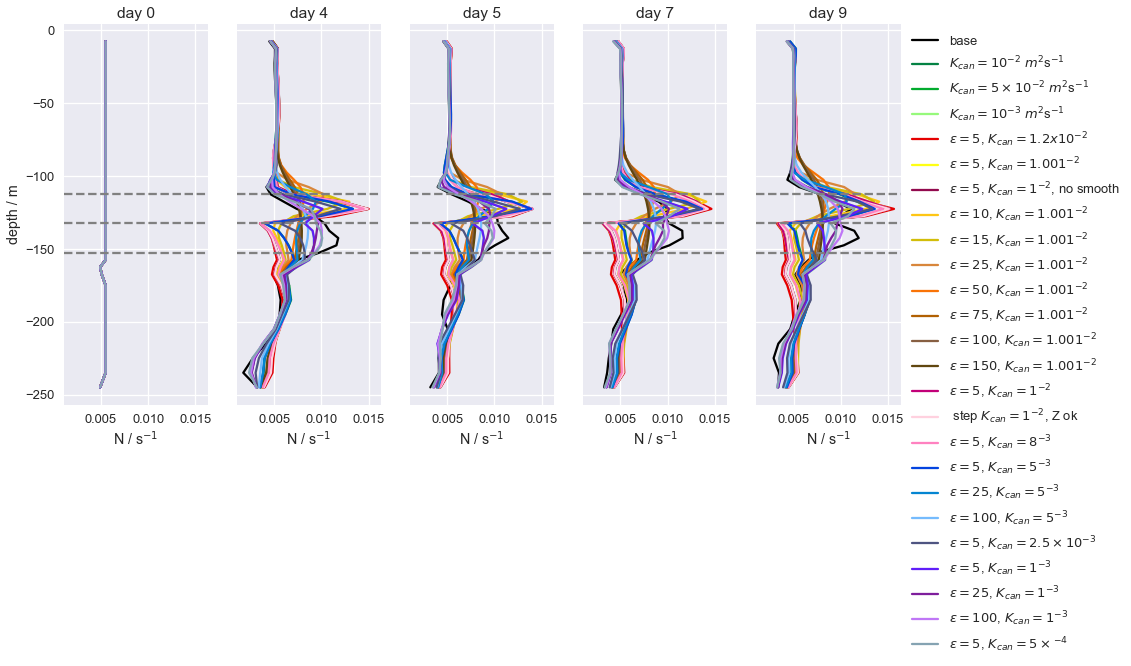

In [59]:
keys = ['N_tt00','N_tt08','N_tt10','N_tt14','N_tt18']
keys2 = ['N_tt08','N_tt10','N_tt12','N_tt14','N_tt16','N_tt18']

days = ['0','4','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records[:]:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    Nab = 0
    Nbe = 0
    Nrim = 0 
    rec.N = df[keys[0]][26]
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],Z1[1:-1], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)
        
    for key,ii in zip(keys2, range(len(keys2))):
        Nab = Nab + np.mean(df[keys2[ii]][22:26])
        Nbe = Nbe + np.mean(df[keys2[ii]][26:30])
        Nrim = Nrim + df[keys2[ii]][29]
    rec.Nab = Nab/  len(keys2)
    rec.Nbe = Nbe/  len(keys2)
    rec.Nrim = Nrim / len(keys2)
        
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth
    ax[ii].axhline(Z1[22],color = '0.5', linestyle = '--') # rim depth
    ax[ii].axhline(Z1[30],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


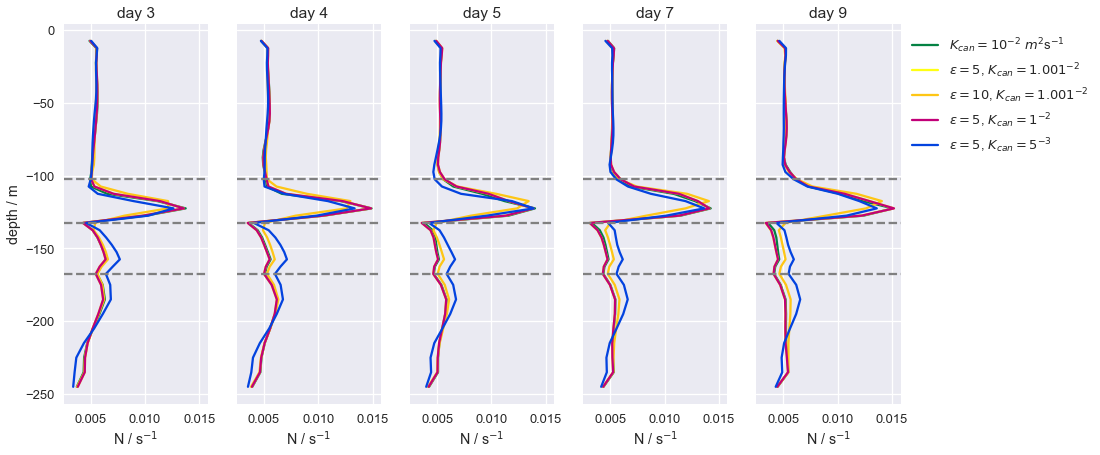

In [7]:
keys = ['N_tt06','N_tt08','N_tt10','N_tt14','N_tt18']
keys2 = ['N_tt08','N_tt10','N_tt12','N_tt14','N_tt16','N_tt18']

days = ['3','4','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records_sel:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    Nab = 0
    Nbe = 0
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],Z1[1:-1], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)

        
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth
    ax[ii].axhline(Z1[20],color = '0.5', linestyle = '--') # rim depth
    ax[ii].axhline(Z1[33],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


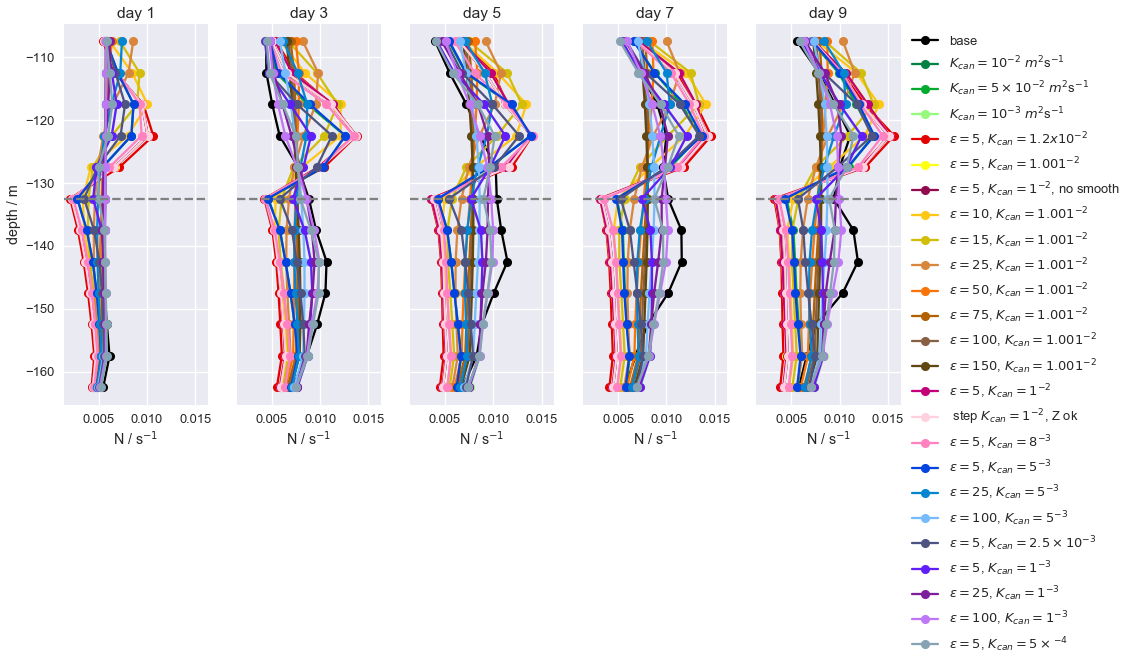

In [8]:
keys = ['N_tt02','N_tt06','N_tt10','N_tt14','N_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],Z1[21:33],'-o', color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)

        
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


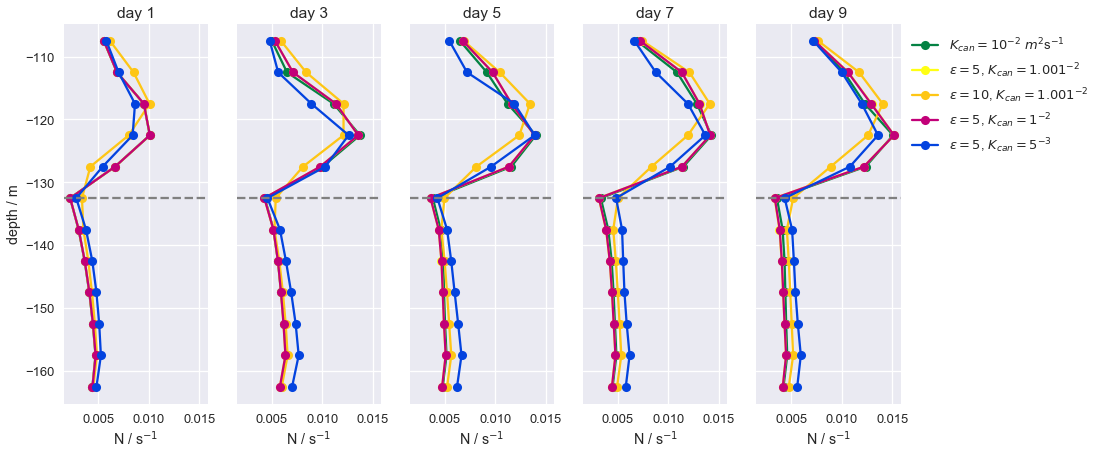

In [9]:
keys = ['N_tt02','N_tt06','N_tt10','N_tt14','N_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records_sel:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/N_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],Z1[21:33],'-o', color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)

        
for ii in range(len(keys)):
    ax[ii].set_xlabel('N / s$^{-1}$')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    
    


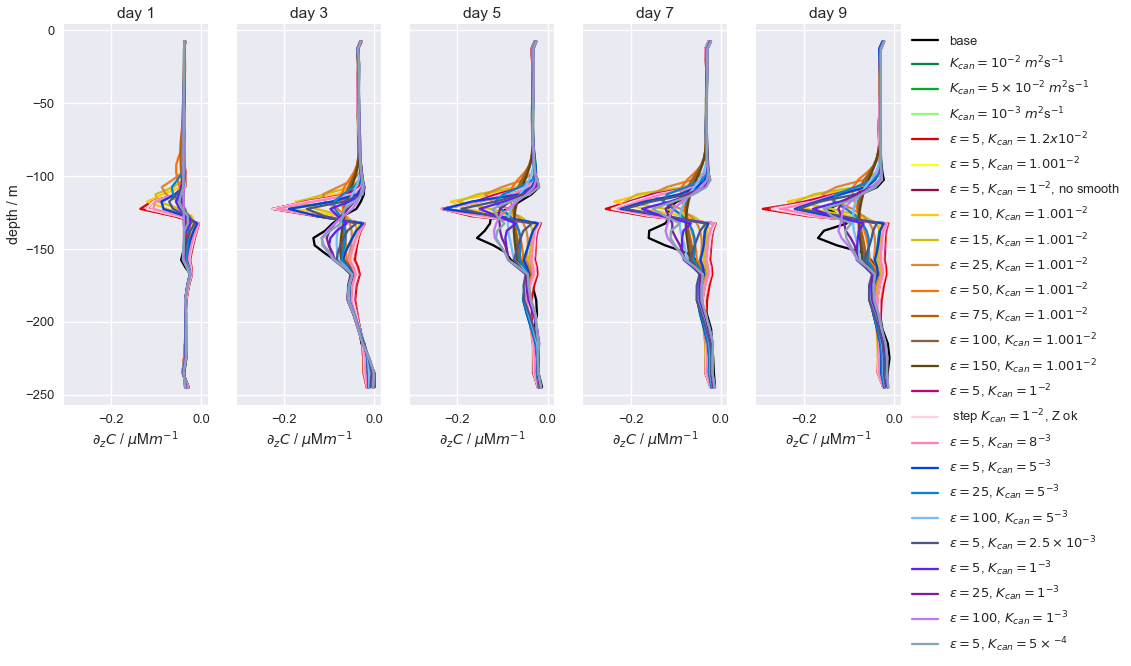

In [10]:
# Tracer gradient

keys = ['dTrdz_tt02','dTrdz_tt06','dTrdz_tt10','dTrdz_tt14','dTrdz_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],Z1[1:-1], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$\partial_zC$ / $\mu$M$m^{-1}$')

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    



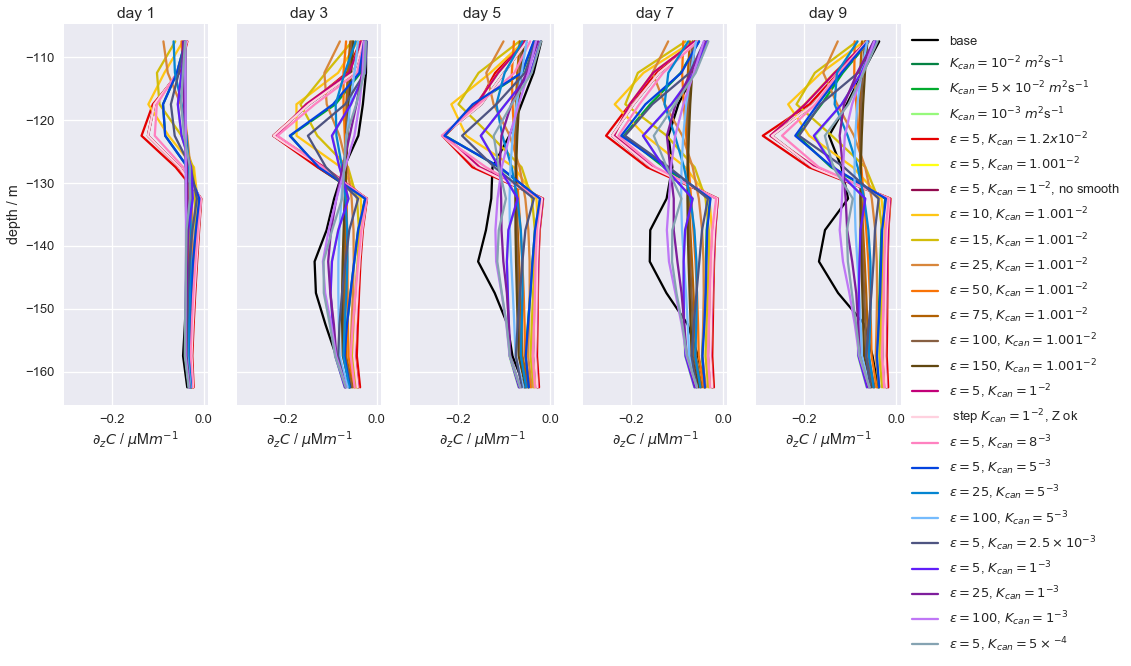

In [11]:
# Tracer gradient

keys = ['dTrdz_tt02','dTrdz_tt06','dTrdz_tt10','dTrdz_tt14','dTrdz_tt18']
days = ['1','3','5','7','9']
sns.set_style('darkgrid')

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/dTr1dz_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],Z1[21:33], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$\partial_zC$ / $\mu$M$m^{-1}$')

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    



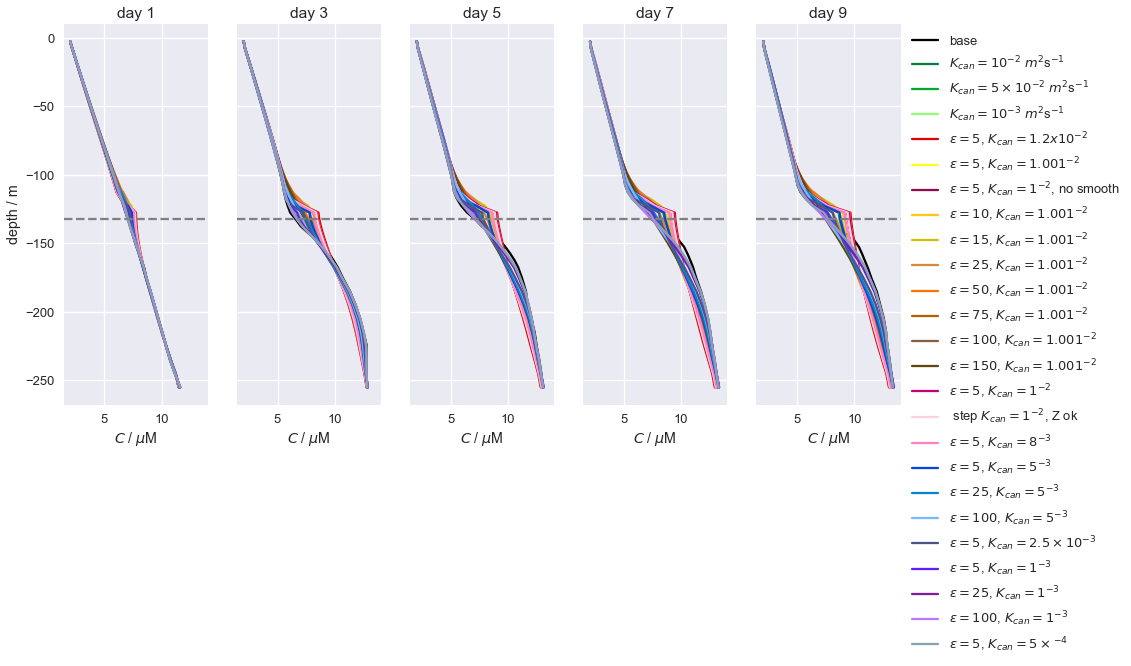

In [12]:
# Tracer profile
sns.set_style('darkgrid')

keys = ['Tr_profile_tt02','Tr_profile_tt06','Tr_profile_tt10','Tr_profile_tt14','Tr_profile_tt18']
days = ['1','3','5','7','9']

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    Crim = 0
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][:],Z1[:], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)
        Crim = Crim + df[keys[ii]][26]
    rec.Crim = Crim /  len(keys)

for ii in range(len(keys)):
    ax[ii].set_xlabel('$C$ / $\mu$M')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    

#plt.savefig('tracerprofile_comparison_realisticKv.eps', format='eps', frameon=False, bbox='tight')

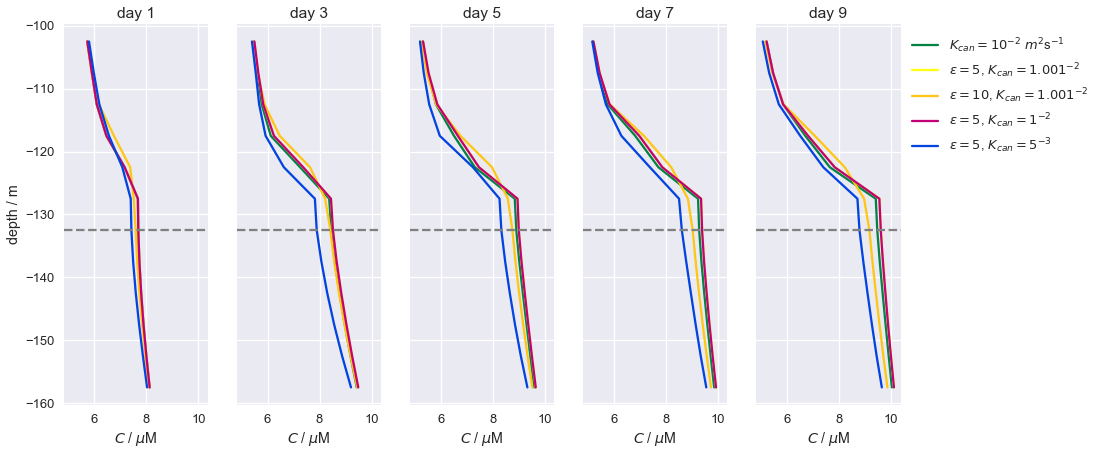

In [13]:
# Tracer profile
sns.set_style('darkgrid')

keys = ['Tr_profile_tt02','Tr_profile_tt06','Tr_profile_tt10','Tr_profile_tt14','Tr_profile_tt18']
days = ['1','3','5','7','9']

stname = 'DnC' # Station at downstream side of canyon

fig, ax = plt.subplots(1,len(keys),figsize=(15,7), sharey = True, sharex = True)

for rec in records_sel:
    
    filename1 = ('/ocean/kramosmu/OutputAnalysis/outputanalysisnotebooks/results/metricsDataFrames/Tr1_profile_%s_%s_%s.csv' %
                 (rec.exp,rec.run,stname))
    df = pd.read_csv(filename1)
    
    for key,ii,day in zip(keys, range(len(keys)), days):
        ax[ii].plot(df[keys[ii]][20:32],Z1[20:32], color= sns.xkcd_rgb[rec.color], label = rec.label)  
        ax[ii].set_title('day %s' %day)


for ii in range(len(keys)):
    ax[ii].set_xlabel('$C$ / $\mu$M')
    ax[ii].axhline(Z1[26],color = '0.5', linestyle = '--') # rim depth

ax[0].set_ylabel('depth / m')
ax[len(keys)-1].legend(bbox_to_anchor=(1,1))    

#plt.savefig('tracerprofile_comparison_realisticKv.eps', format='eps', frameon=False, bbox='tight')

CNTDIFF_run38 0.0 0.0
VISC3D_run06 8.12984800183 16.8664908686
VISC3D_run05 6.91917172334 14.6976760721
VISC3D_run03 -2.19160090733 0.809345365962
VISC3D_REALISTIC_run24 10.2935776836 18.8267117206
VISC3D_REALISTIC_run14 3.9279452316 13.1290841393
VISC3D_REALISTIC_run27 8.12984800183 16.8664908686
VISC3D_REALISTIC_run07 4.38903262804 13.3557649925
VISC3D_REALISTIC_run11 5.0822212831 13.9355251501
VISC3D_REALISTIC_run08 6.94023582411 14.387865034
VISC3D_REALISTIC_run09 11.585182435 15.9403294307
VISC3D_REALISTIC_run12 14.4790829135 16.9936946782
VISC3D_REALISTIC_run10 18.7583384005 20.3429420556
VISC3D_REALISTIC_run13 24.0541698806 24.6295114103
VISC3D_REALISTIC_run15 4.33353909183 13.5257510135
VISC3D_REALISTIC_run28 8.12984800183 16.8664908686
VISC3D_REALISTIC_run23 7.77666103313 16.5133520006
VISC3D_REALISTIC_run17 6.76334377399 15.2279840543
VISC3D_REALISTIC_run21 3.66940162006 9.51846184226
VISC3D_REALISTIC_run22 7.04443659615 9.15466975127
VISC3D_REALISTIC_run25 2.53660814854 8.52

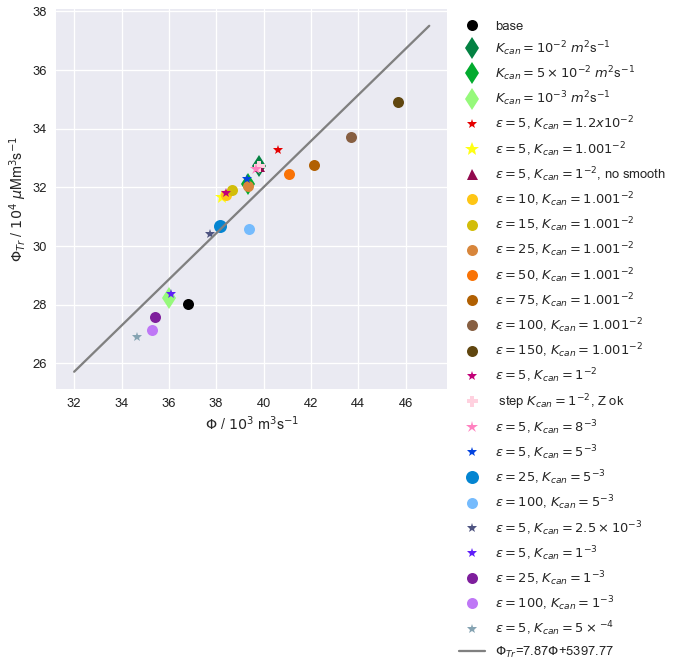

In [14]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

rec0 = records[0] # base case
for rec in records:
    #ax.errorbar(rec.Phi, rec.PhiTr, xerr=rec.Phi_std,yerr=rec.PhiTr_std, color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax.plot(rec.Phi/1E3, rec.PhiTr/1E4, rec.mark, markersize = rec.size, color=sns.xkcd_rgb[rec.color], label=rec.label)
    rec.Phi_inc = 100*((rec.Phi-rec0.Phi)/rec0.Phi) 
    rec.PhiTr_inc = 100*((rec.PhiTr-rec0.PhiTr)/rec0.PhiTr) 
    print(rec.name,rec.Phi_inc,rec.PhiTr_inc)
ax.set_ylabel(r'$\Phi_{Tr}$ / $10^4$ $\mu$Mm$^{3}$s$^{-1}$')
ax.set_xlabel(r'$\Phi$ / $10^3$ m$^{3}$s$^{-1}$')


# Fit line using only realistic Kv cases
records_NoKv = records#[records[0],records[4],records[5],records[6],records[7],records[8],records[9]]
Phi_array = np.array([rec.Phi for rec in records_NoKv])
PhiTr_array = np.array([rec.PhiTr for rec in records_NoKv])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Phi_array,PhiTr_array)

ax.plot(np.linspace(32000,47000,100)/1E3,((slope*np.linspace(32000,47000,100))+intercept)/1E4, 
        color='0.5', label = r'$\Phi_{Tr}$=%1.2f$\Phi$+%1.2f' %(slope,intercept))

ax.legend(bbox_to_anchor=(1,1))    


* The Monterey bottom-normalized Kv profile increases the water flux by 38.42% and tracer flux by 35.34% with respect to the base case.
* Ascension profiles increase tracer upwelling flux by 28% (rim) and 34% (bottom).
* Tracer flux is linearly proportional to water flux for realistic profiles; step Kv profiles seem to be outliers.
* This suggests that the increase in tracer flux is caused by the decrease in stratification due to realistic profiles that increases the water flux.
* Water flux is also larger in cases with a step kv profile (8.13% to 6.91%) but it is not the only thing causing an increase in tracer flux (the increase seems larger than expected from the realistic cases, 16.8% to 14.5%, double the increase in $\Phi$).The extra increase caused by an increase in concentration near the rim.


### Plot Kv initial profiles (From IC files)

In [15]:
kv_dir = '/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/'
ini_kv_files = [kv_dir + 'KrDiff1E_5_1E_2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff1E_5_5E_3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff1E_5_1E_3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_exact1p2E2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_exact_nosmooth_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e10_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e15_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e25_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e50_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e75_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e100_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e150_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_exact_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff1E_5_1E_2_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_exact8E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_exact5E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e25_exact5E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e100_exact5E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_exact2p5E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_exact1E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e25_exact1E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e100_exact1E3_90zlev_616x360_Quad.bin',
                kv_dir + 'KrDiff_e05_exact5E4_90zlev_616x360_Quad.bin',]
                
dt = np.dtype('>f8')  # float 64 big endian
DnS = [245, 200] # y, x indices of DnS station

ini_kv_profiles = np.zeros((len(ini_kv_files),nz))

for file, ii in zip(ini_kv_files, range(len(ini_kv_files))):
    data = np.fromfile(file, dt)
    print(file)
    ini_kv = np.reshape(data,(nz,ny,nx),order='C')
    ini_kv_profiles[ii,:] = ini_kv[:, DnS[0], DnS[1]] 

/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff1E_5_1E_2_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff1E_5_5E_3_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff1E_5_1E_3_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e05_exact1p2E2_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e05_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e05_exact_nosmooth_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e10_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e15_90zlev_616x360_Quad.bin
/ocean/kramosmu/Building_canyon/BuildCanyon/Stratification/616x360x90/KrDiff_e25_90zlev_616x360_Quad.bin
/ocean/kramosm

Text(0.009,15,'Initial $K_v$ profiles')

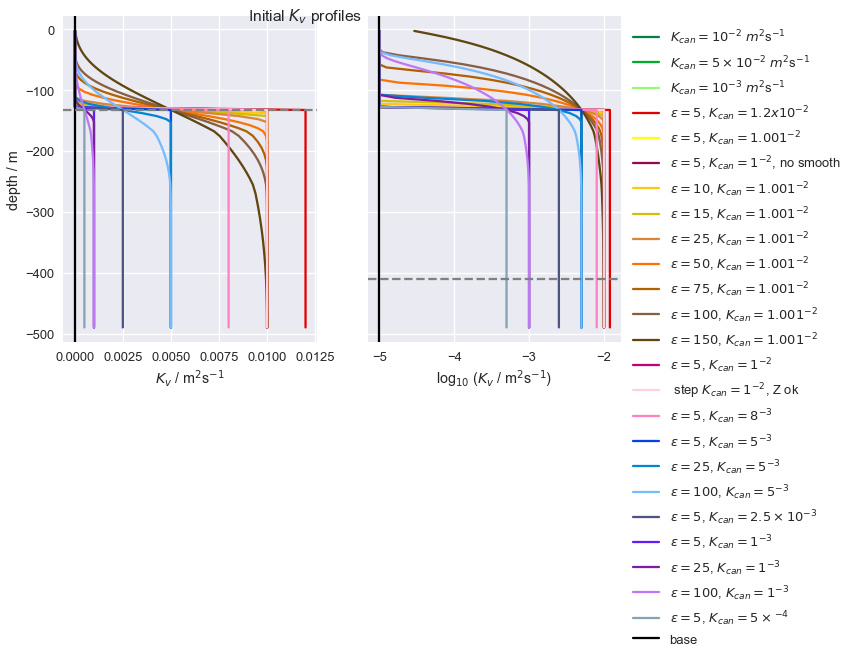

In [16]:
fig,ax = plt.subplots(1, 2,figsize = (10,6), sharey = True )

for ii, rec in zip(range(len(ini_kv_files)), records_nobase):
    ax[0].plot(ini_kv_profiles[ii,:55], Z1[:55],'-', color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[1].plot(np.log10(ini_kv_profiles[ii,:55]), Z1[:55],'-', color=sns.xkcd_rgb[rec.color], label=rec.label)
    rec.kv_rim = np.mean(ini_kv_profiles[ii,15:26])-np.mean(ini_kv_profiles[ii,26:33])
    rec.kv_bg = np.mean(ini_kv_profiles[ii,22])
    rec.kv_can = np.mean(ini_kv_profiles[ii,50])
 
rec0.kv_rim = 1E-5 
rec0.kv_bg = 1E-5 
rec0.kv_can = 1E-5 
ax[0].axvline(1E-5, color='k', label='base')    
ax[1].axvline(-5, color='k', label='base')    
ax[0].axhline(Z1[26], color = '0.5', linestyle = '--')
ax[1].axhline(Z1[50], color = '0.5', linestyle = '--')
ax[1].legend(bbox_to_anchor=(1,1))
ax[0].set_xlabel('$K_v$ / m$^2$s$^{-1}$')
ax[1].set_xlabel('log$_{10}$ ($K_v$ / m$^2$s$^{-1}$)')
ax[0].set_ylabel('depth / m')
ax[0].text(0.009, 15, r'Initial $K_v$ profiles')

24


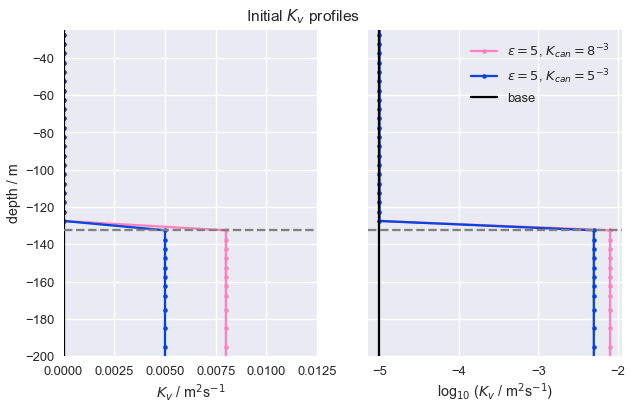

In [17]:
fig,ax = plt.subplots(1, 2,figsize = (10,6), sharey = True )

for ii, rec in zip([15,16], [records[16],records[17]]):
    ax[0].plot(ini_kv_profiles[ii,:55], Z1[:55],'.-', 
               color=sns.xkcd_rgb[rec.color], label=rec.label)
    ax[1].plot(np.log10(ini_kv_profiles[ii,:55]), Z1[:55],'.-', 
               color=sns.xkcd_rgb[rec.color], label=rec.label)
    
ax[0].axvline(1E-5, color='k', label='base')    
ax[1].axvline(-5, color='k', label='base')    
ax[0].axhline(Z1[26], color = '0.5', linestyle = '--')
ax[1].axhline(Z1[26], color = '0.5', linestyle = '--')
ax[1].legend(bbox_to_anchor=(1,1))
ax[0].set_xlabel('$K_v$ / m$^2$s$^{-1}$')
ax[1].set_xlabel('log$_{10}$ ($K_v$ / m$^2$s$^{-1}$)')
ax[0].set_ylabel('depth / m')
ax[0].text(0.009, -20, r'Initial $K_v$ profiles')
ax[0].set_ylim(-200,-25)
ax[0].set_xlim(0,0.0125)
print(len(ini_kv_files))

From this plot and the one before:
* Runs with larger Kv at the rim have larger upwelling fluxes (except for the Kv step profiles)
* $\Phi$ for the base case is very similar to Eel rim, which has almost 10 times more diffusivity and I would expect to be a lot larger than the base case. ($10^{-5}$ vs $10^{-4}$ m$^2$s$^{-1}$).
* Rim-normalized runs have lower $\Phi$ than bottom-normalized runs, why? For Eel and Ascension, rim-normalized profiles have a deeper belly of higher Kv than bottom-normalized profiles. Monterey bottom is just higher than Monterey rim everywhere above 200 m.
    
Maybe, there is not much difference between $10^{-5}$ m$^2$s$^{-1}$ and $10^{-4}$ m$^2$s$^{-1}$ for the model or not enough time to see its effects...

### Find the N, Kv that matters


run 	 	 	 K_can 	  Kv_bg 	 Kv_rim
VISC3D_run06, 1.00e-02, 1.00e-05, -9.99e-03
VISC3D_run05, 5.00e-03, 1.00e-05, -4.99e-03
VISC3D_run03, 1.00e-03, 1.00e-05, -9.90e-04
VISC3D_REALISTIC_run24, 1.20e-02, 1.00e-05, -1.20e-02
VISC3D_REALISTIC_run14, 1.00e-02, 1.00e-05, -1.00e-02
VISC3D_REALISTIC_run27, 1.00e-02, 1.00e-05, -9.99e-03
VISC3D_REALISTIC_run07, 1.00e-02, 1.00e-05, -9.20e-03
VISC3D_REALISTIC_run11, 1.00e-02, 1.00e-05, -8.80e-03
VISC3D_REALISTIC_run08, 1.00e-02, 7.45e-05, -8.10e-03
VISC3D_REALISTIC_run09, 1.00e-02, 1.50e-03, -6.42e-03
VISC3D_REALISTIC_run12, 1.00e-02, 2.49e-03, -5.06e-03
VISC3D_REALISTIC_run10, 1.00e-02, 3.07e-03, -4.07e-03
VISC3D_REALISTIC_run13, 9.95e-03, 3.70e-03, -2.87e-03
VISC3D_REALISTIC_run15, 1.00e-02, 1.00e-05, -9.99e-03
VISC3D_REALISTIC_run28, 1.00e-02, 1.00e-05, -9.99e-03
VISC3D_REALISTIC_run23, 8.00e-03, 1.00e-05, -7.99e-03
VISC3D_REALISTIC_run17, 5.00e-03, 1.00e-05, -4.99e-03
VISC3D_REALISTIC_run21, 5.00e-03, 4.22e-05, -4.04e-03
VISC3D_REALISTIC_run22, 

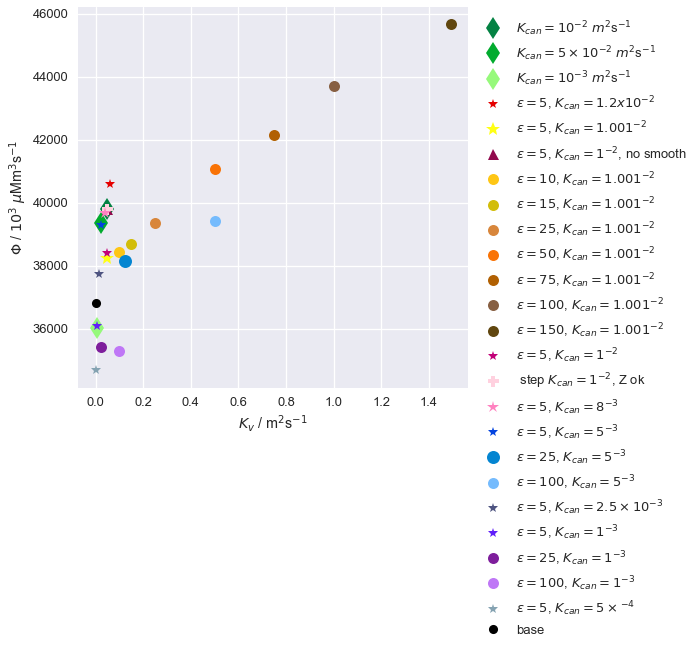

In [45]:
epsilon = [200,5,5,5, 5, 5, 5,10,15,25,50,75,100,150,5,5,5,5,25,100,5,5,25,100,5]
sns.set_style('darkgrid')
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

print('run \t \t \t K_can \t  Kv_bg \t Kv_rim')
rec0 = records[0] # base case
rec0.kv_rim = 1E-5
for rec,eps in zip(records[1:], epsilon[1:]):
    ax.plot(rec.kv_can*eps,(rec.Phi),rec.mark, markersize=rec.size,color=sns.xkcd_rgb[rec.color], label=rec.label)
    print('%s, %1.2e, %1.2e, %1.2e' %(rec.name, rec.kv_can, rec.kv_bg, rec.kv_rim))
ax.plot(rec0.kv_can,(rec0.Phi),'o', color=sns.xkcd_rgb[rec0.color], label=rec0.label)

ax.set_ylabel(r'$\Phi$ / $10^3$ $\mu$Mm$^{3}$s$^{-1}$')
ax.set_xlabel(r'$K_v$ / m$^2$s$^{-1}$')


ax.legend(bbox_to_anchor=(1,1))    


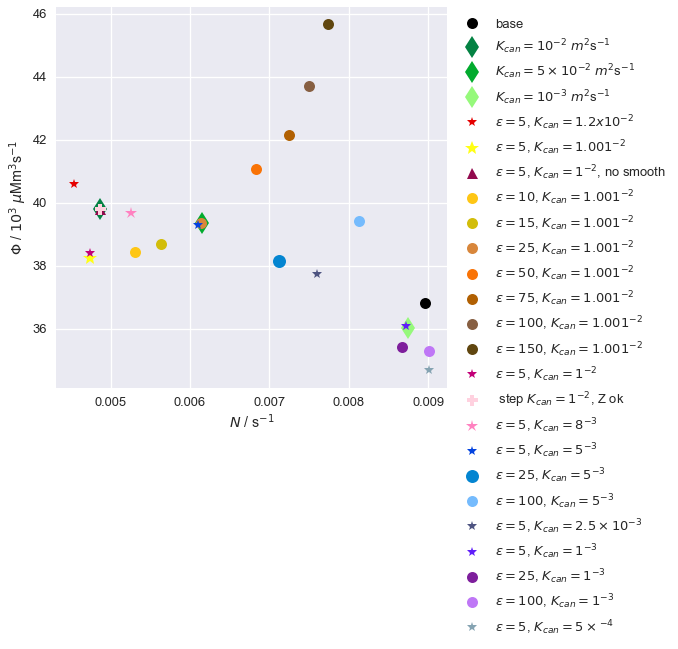

In [81]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

for rec in records[:]:
    ax.plot(rec.Nrim,rec.Phi/1E3,rec.mark, markersize=rec.size,color=sns.xkcd_rgb[rec.color], 
            label=rec.label)
ax.set_ylabel(r'$\Phi$ / $10^3$ $\mu$Mm$^{3}$s$^{-1}$')
ax.set_xlabel(r'$N$ / s$^{-1}$')


ax.legend(bbox_to_anchor=(1,1))    


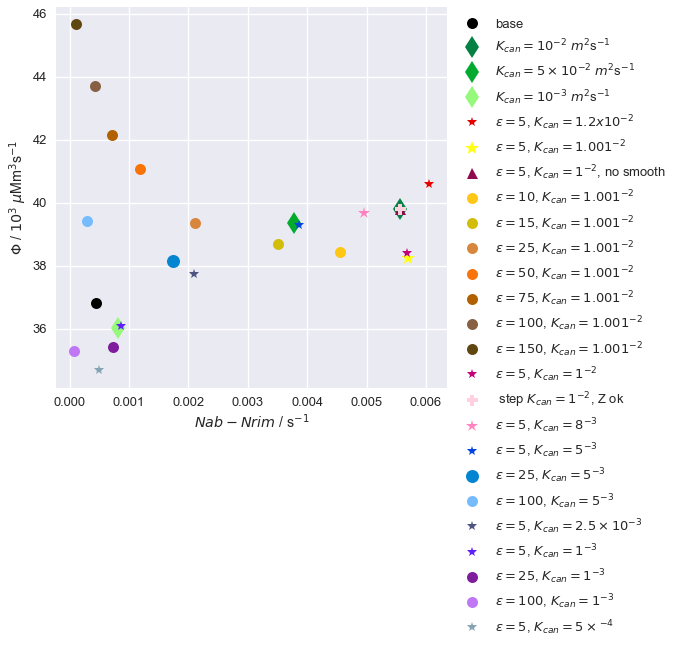

In [84]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

for rec in records[:]:
    ax.plot(rec.Nab-rec.Nrim,rec.Phi/1E3,rec.mark, markersize=rec.size,color=sns.xkcd_rgb[rec.color], 
            label=rec.label)
ax.set_ylabel(r'$\Phi$ / $10^3$ $\mu$Mm$^{3}$s$^{-1}$')
ax.set_xlabel(r'$Nab-Nrim$ / s$^{-1}$')


ax.legend(bbox_to_anchor=(1,1))    


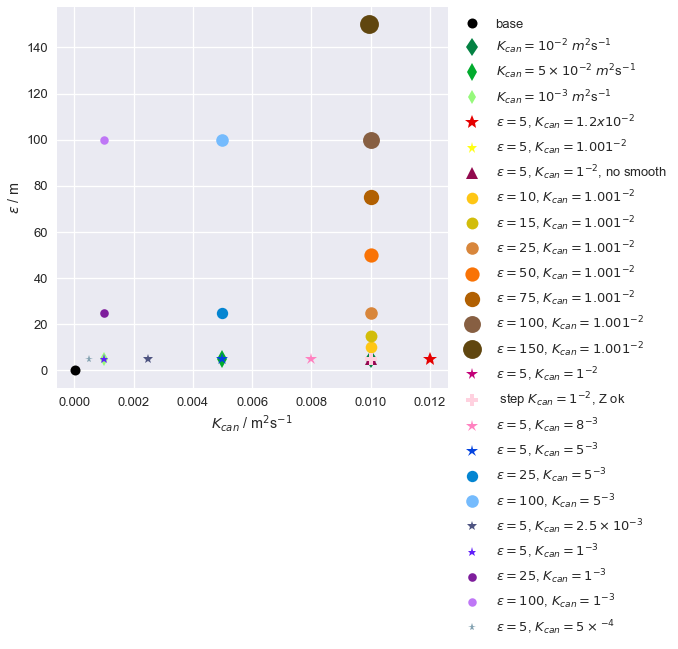

In [38]:
epsilon = [0,5,5,5, 5, 5, 5,10,15,25,50,75,100,150,5,5,5,5,25,100,5,5,25,100,5]
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

for rec,eps in zip(records[:],epsilon):
    ax.plot(rec.kv_can,eps,rec.mark,markersize=((rec.Phi-rec0.Phi)/1E3)+10, color=sns.xkcd_rgb[rec.color], label=rec.label)

ax.set_xlabel(r'$K_{can}$ / m$^{2}$s$^{-1}$')
ax.set_ylabel(r'$\epsilon$ / m')


ax.legend(bbox_to_anchor=(1,1))    


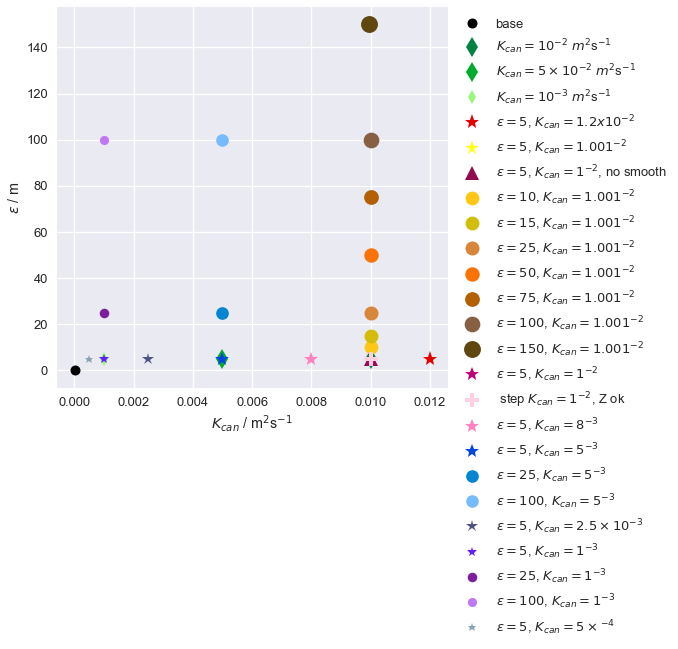

In [40]:
epsilon = [0,5,5,5, 5, 5, 5,10,15,25,50,75,100,150,5,5,5,5,25,100,5,5,25,100,5]
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,1,figsize=(7,7), sharey = True, sharex = True)

for rec,eps in zip(records[:],epsilon):
    ax.plot(rec.kv_can,eps,rec.mark,markersize=((rec.PhiTr-rec0.PhiTr)/1E4)+10, color=sns.xkcd_rgb[rec.color], label=rec.label)

ax.set_xlabel(r'$K_{can}$ / m$^{2}$s$^{-1}$')
ax.set_ylabel(r'$\epsilon$ / m')


ax.legend(bbox_to_anchor=(1,1))    
